/scratch/19582445/ipykernel_321270/1946935223.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("significant_chi2_channels.txt", header = None, sep="[;,:,=]")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'chr19_CACNG6 '),
  Text(1, 0, 'chr9_TRPM6 '),
  Text(2, 0, 'chr1_KCNK1 '),
  Text(3, 0, 'chr15_CATSPER2 '),
  Text(4, 0, 'chr6_KCNK16 '),
  Text(5, 0, 'chr20_KCNS1 '),
  Text(6, 0, 'chr2_SCN9A '),
  Text(7, 0, 'chr17_TRPV2 '),
  Text(8, 0, 'chr5_CATSPER3 '),
  Text(9, 0, 'chr17_KCNH6 '),
  Text(10, 0, 'chr3_CACNA1D '),
  Text(11, 0, 'chr1_CATSPERE '),
  Text(12, 0, 'chr1_CATSPER4 '),
  Text(13, 0, 'chr1_KCNN3 '),
  Text(14, 0, 'chr3_SCN5A '),
  Text(15, 0, 'chr5_TRPC7 '),
  Text(16, 0, 'chr17_CACNG4 '),
  Text(17, 0, 'chr7_KCNH2 '),
  Text(18, 0, 'chr10_CACNB2 '),
  Text(19, 0, 'chr2_SCN2A ')])

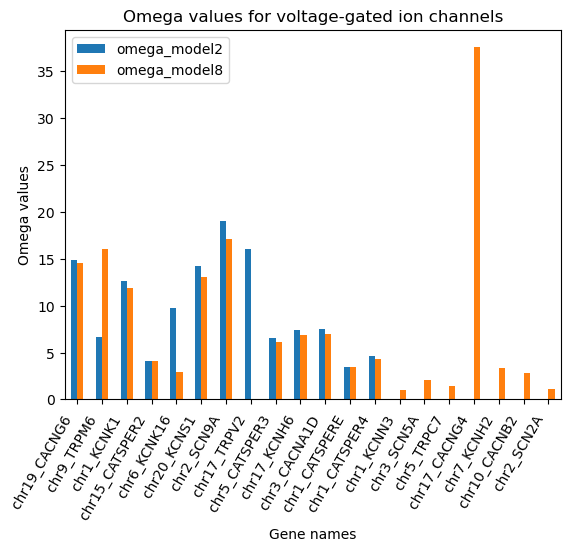

In [16]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

df1 = pd.read_csv("significant_chi2_channels.txt", header = None, sep="[;,:,=]")
df1 = df1.drop([1, 3, 5], axis="columns")
df1 = df1.rename(columns={0: "genename", 2: "model", 4: "p-value", 6: "omega"})


model2 = df1[df1.model != 8]
model8 = df1[df1.model != 2]
df = pd.merge(model2, model8, on='genename', how="outer").fillna(0)
df = df.drop(["model_x", "p-value_x", "model_y", "p-value_y"], axis="columns")
df = df.rename(columns={"omega_x": "omega_model2", "omega_y": "omega_model8"})
df = df.set_index("genename")


df.plot(kind="bar")
plot.title("Omega values for voltage-gated ion channels")
plot.xlabel("Gene names")
plot.ylabel("Omega values")
plot.xticks(rotation=60, horizontalalignment="right")

In [2]:
import csv
import numpy as np
import pandas as pd

df=pd.read_csv("Channel_genes.csv", sep=";")
df = df.drop(["HGNC"], axis="columns")
channel_dict={k: g["ID"].tolist() for k,g in df.groupby("Type")}

index1 = channel_dict.keys()
data = {"Channel_type": index1, "Total_genes":[], "Positive_selection_genes":[], "Positive_selection_percentage":[]}
for key in channel_dict:
    total_genes = len(channel_dict[key])
    positive_selection=0
    for value in channel_dict[key]:
        with open(r"significant_chi2_channels.txt", "r") as fp:
            lines = fp.readlines()
            for line in lines:
                if line.find(value) != -1:
                    positive_selection += 1
                    break;
    percentage = (positive_selection/total_genes)*100
    data["Total_genes"].append(total_genes)
    data["Positive_selection_genes"].append(positive_selection)
    data["Positive_selection_percentage"].append(percentage)

    
df1 = pd.DataFrame(data, columns=data.keys())
df1 = df1.set_index("Channel_type")
print(df1)
    


                                             Total_genes   
Channel_type                                               
calcium-voltage-gated-channel                         26  \
catsper-channel                                        9   
cyclic-nucleotide-gated-channel                       10   
hydrogen-voltage-gated-channel                         1   
potassium-calcium-activated-channel                    6   
potassium-two-pore                                    15   
potassium-voltage-gated-channel                       40   
sodium-voltage-gated-channel                          13   
transient-receptor-potential-cation-channel           28   
two-pore-segment-channel                               2   

                                             Positive_selection_genes   
Channel_type                                                            
calcium-voltage-gated-channel                                       4  \
catsper-channel                                             

/scratch/19582445/ipykernel_321270/3537108497.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("significant_chi2_channels.txt", header = None, sep="[;,:,=]")


(array([0, 1, 2, 3]),
 [Text(0, 0, 'chr15_CATSPER2 '),
  Text(1, 0, 'chr5_CATSPER3 '),
  Text(2, 0, 'chr1_CATSPERE '),
  Text(3, 0, 'chr1_CATSPER4 ')])

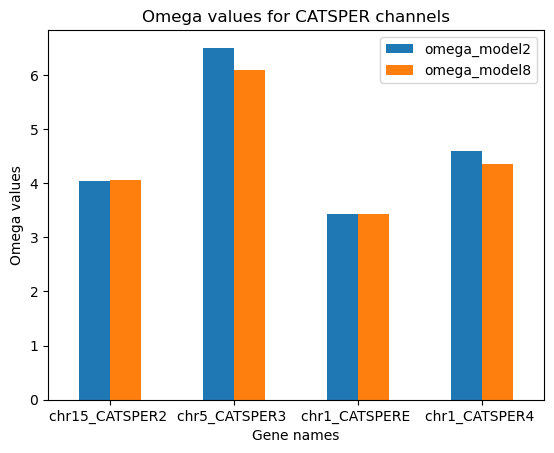

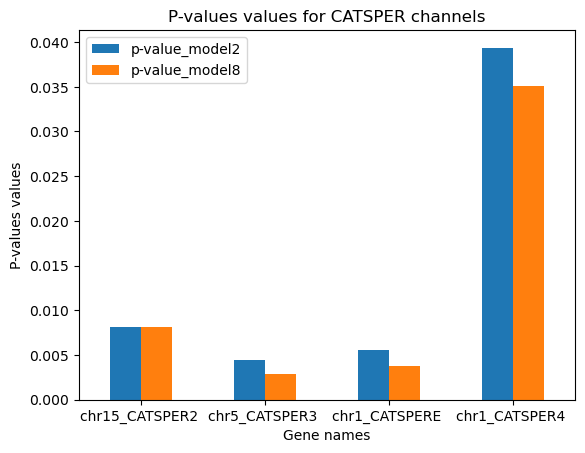

In [15]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import csv
import numpy as np
import pandas as pd

df1 = pd.read_csv("significant_chi2_channels.txt", header = None, sep="[;,:,=]")
df1 = df1.drop([1, 3, 5], axis="columns")
df1 = df1.rename(columns={0: "genename", 2: "model", 4: "p-value", 6: "omega"})
keep = ["CATSPER"]
df2 = df1[df1.genename.str.contains('|'.join(keep))]

model2 = df2[df2.model != 8]
model8 = df2[df2.model != 2]
df = pd.merge(model2, model8, on='genename', how="outer").fillna(0)
df = df.drop(["model_x", "p-value_x", "model_y", "p-value_y"], axis="columns")
df = df.rename(columns={"omega_x": "omega_model2", "omega_y": "omega_model8"})
df = df.set_index("genename")

df.plot(kind="bar")
plot.title("Omega values for CATSPER channels")
plot.xlabel("Gene names")
plot.ylabel("Omega values")
plot.xticks(rotation=0, horizontalalignment="center")

df3 = pd.merge(model2, model8, on='genename', how="outer").fillna(0)
df3 = df3.drop(["model_x", "omega_x", "model_y", "omega_y"], axis="columns")
df3 = df3.rename(columns={"p-value_x": "p-value_model2", "p-value_y": "p-value_model8"})
df3 = df3.set_index("genename")

df3.plot(kind="bar")
plot.title("P-values values for CATSPER channels")
plot.xlabel("Gene names")
plot.ylabel("P-values values")
plot.xticks(rotation=0, horizontalalignment="center")

  